In [2]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np


# Cicle Detection

[533 300]


Text(0.5, 1.0, 'Crop circle')

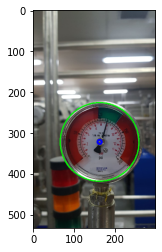

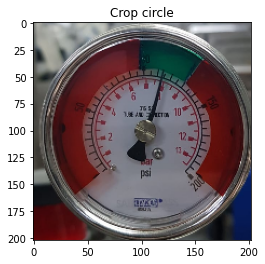

In [9]:
# Read image. 

o_image = cv2.imread('Bar_1.jpeg')
o_image= cv2.cvtColor(o_image, cv2.COLOR_BGR2RGB)
ideal_size = 300


new_size = np.round(np.array(o_image.shape)[:2] * 1/(min(np.array(o_image.shape)[:2]) / 300))
new_size = new_size.astype(int)
print(new_size)
o_image = cv2.resize(o_image, (new_size[1], new_size[0]))

image = o_image.copy()
# Convert to grayscale. 
gray = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)[:,:,2] 
#

min_size = min(gray.shape)
max_size = max(gray.shape)

# Blur using 3 * 3 kernel. 
gray_blurred = cv2.blur(gray, (5, 5)) 
  
# Apply Hough transform on the blurred image. 
detected_circles = cv2.HoughCircles(gray_blurred,  
                   cv2.HOUGH_GRADIENT, dp = 1, minDist = max_size/2, param1 = 200, 
               param2 = 30, minRadius = int(min_size/10), maxRadius = int(min_size/2)) 

# Draw circles that are detected. 
if detected_circles is not None: 
  
    # Convert the circle parameters a, b and r to integers. 
    detected_circles = np.uint16(np.around(detected_circles)) 
    
    for pt in detected_circles[0, :]: 
        a, b, r = pt[0], pt[1], pt[2] 
  
        # Draw the circumference of the circle. 
        cv2.circle(image, (a, b), r, (0, 255, 0), 2) 
  
        # Draw a small circle (of radius 1) to show the center. 
        cv2.circle(image, (a, b), 5, (0, 0, 255), 3) 
        plt.figure()
        plt.imshow(image)


## Doble detección de circulos
cx,cy,r  = detected_circles[0][0]  # utilizar solo un circulo detectado
cx = int(cx)
cy = int(cy)
r = int (r)
delta = 5
r +=delta


plt.figure()
plt.imshow(o_image[cy-r:cy+r,cx-r:cx+r])
plt.title('Crop circle')


# Analysis  

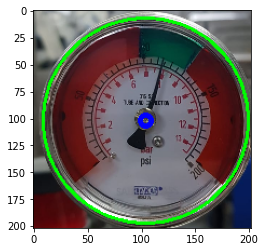

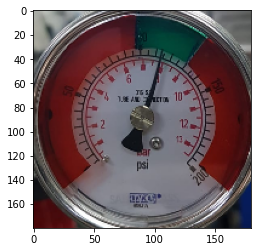

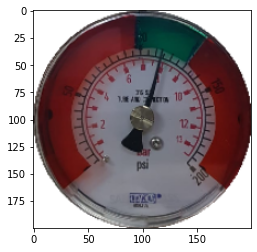

In [10]:

# Convert to grayscale. 
gray_blurred = gray_blurred[cy-r:cy+r,cx-r:cx+r]
image_crop = o_image[cy-r:cy+r,cx-r:cx+r].copy()
image = image_crop.copy()
#
min_size = min(gray_blurred.shape)
max_size = max(gray_blurred.shape)


# Apply Hough transform on the blurred image. 
detected_circles = cv2.HoughCircles(gray_blurred,  
                   cv2.HOUGH_GRADIENT, dp = 1, minDist = max_size/2, param1 = 200, 
                   param2 = 30, minRadius = int(min_size/10), maxRadius = int(min_size/2)) 



# Draw circles that are detected. 
if detected_circles is not None: 
  
    # Convert the circle parameters a, b and r to integers. 
    detected_circles = np.uint16(np.around(detected_circles)) 
  
    for pt in detected_circles[0, :]: 
        a, b, r = pt[0], pt[1], pt[2] 
  
        # Draw the circumference of the circle. 
        cv2.circle(image, (a, b), r, (0, 255, 0), 2) 
  
        # Draw a small circle (of radius 1) to show the center. 
        cv2.circle(image, (a, b), 5, (0, 0, 255), 3) 
        plt.figure()
        plt.imshow(image)




cx2,cy2,r2  = detected_circles[0][0]  # utilizar solo un circulo detectado
delta = -5
r2 +=delta
cx2 = int(cx2)
cy2 = int(cy2)
r2 = int (r2)

plt.figure()
plt.imshow(image_crop[cy2 - r2: cy2 + r2, cx2-r2 : cx2 + r2])
image_center =image_crop[cy2 - r2: cy2 + r2, cx2-r2 : cx2 + r2].copy()

for i in range(image_center.shape[0]):
    for j in range(image_center.shape[1]):
        if ((r2-i) ** 2 + (r2-j) ** 2) > r2**2 - delta*2 : 
            image_center[i][j] = 255

new_size = 200
image_center = cv2.resize(image_center, (new_size, new_size))

plt.figure()
plt.imshow(image_center)




Text(0.5, 1.0, 'polar image')

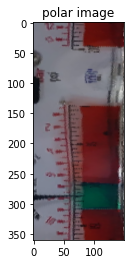

In [11]:
center = np.array(image_center.shape[:2])/2
maxRadius = min(np.array(image_center.shape[:2])/2)

border = 50
polar_image = cv2.linearPolar(image_center, (center[0], center[1]), maxRadius, cv2.WARP_FILL_OUTLIERS)
polar_image = cv2.resize(polar_image, (new_size, 360))
polar_image = polar_image.astype(np.uint8)
polar_image = polar_image[:, border:]

##Inverse transform
#original_image = cv2.linearPolar(polar_image, (180,180), maxRadius*.5, cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)

plt.imshow(polar_image)
plt.title( 'polar image')

Text(0.5, 1.0, 'erosion image')

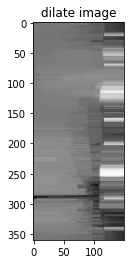

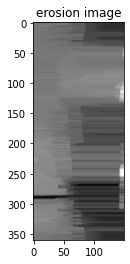

In [12]:
gray_image = cv2.cvtColor(polar_image, cv2.COLOR_RGB2HSV)[:,:,2]

kernel = np.ones((1, int(new_size/3)),np.uint8)
#kernel_2 = np.ones((1, int(new_size/3)),np.uint8)
dilate = cv2.dilate(gray_image, kernel, iterations = 1)
erosion = cv2.erode(dilate, kernel, iterations = 1)

plt.figure()
plt.imshow(dilate, cmap = 'gray')
plt.title('dilate image')
plt.figure()
plt.imshow(erosion, cmap = 'gray')
plt.title( 'erosion image')

Umbral fijo1 184.0
Umbral fijo1 142.0
Umbral fijo1 109.0
Umbral fijo1 84.0
Umbral fijo1 64.0


Text(0.5, 1.0, 'threshold image')

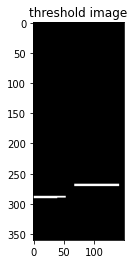

In [13]:
#plt.hist(gray_image)

#ret2,th2 = cv2.threshold(erosion,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

umbral = 240
ret,th = cv2.threshold(erosion,umbral,255,cv2.THRESH_BINARY_INV)

while (np.sum(th == 255)/th.size) * 100 > 5: # porcentaje de area de las manillas
    umbral /=1.3
    ret,th = cv2.threshold(erosion,umbral,255,cv2.THRESH_BINARY_INV)
    print("Umbral fijo1",ret)
    


    
th = cv2.dilate(th, np.ones((3,3), np.uint8), iterations = 1)
plt.imshow(th, cmap = 'gray')
plt.title( 'threshold image')


145.5
219.0


{0: (24, 288, 53, 145.5)}

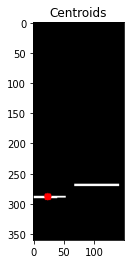

In [14]:
num_labels, labels_im = cv2.connectedComponents(th)

labels_im -= 1
contours, hierarchy = cv2.findContours(th, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

threshold_min_area = 10
epsilon = 0.0001
copy_th = cv2.cvtColor(th,cv2.COLOR_GRAY2RGB)
 
center_dict = {}
for n, c in enumerate(contours):
   M = cv2.moments(c)
   cX = int(M["m10"] / (M["m00"] + epsilon))
   cY = int(M["m01"] / (M["m00"] + epsilon))
   max_X = max([a[0][0] for a in c])
   min_X = min([a[0][0] for a in c])
   if min_X == 0 and M["m00"] > threshold_min_area:
       center_dict[n] = (cX, cY, max_X, M["m00"]) # Centroides, distancia máxima de la barra y tamaño de la barra

       cv2.circle(copy_th, (cX, cY), 1, (255, 0, 0), 10) 
   print(M["m00"]) 
plt.imshow(copy_th)
plt.title('Centroids')

center_dict

In [15]:
center_dict_filter = {}
n = 0
for k in center_dict:

    cX,cY, max_X, masa = center_dict[k]
    for j in center_dict:
        
        if  k == j:
            continue
        #print(k,j)
        if np.abs(cY-center_dict[j][1])< 200 and np.abs(cY-center_dict[j][1]) > 160:
            if max_X > center_dict[j][2]:
                center_dict_filter[n] = center_dict[k]
                n +=1
    
if center_dict_filter == {}: ## la barra no cruza el centro del reloj
    center_dict_filter = center_dict 
    
center_dict_filter
for k in center_dict_filter:
    print('Existe una manilla en los ', (center_dict_filter[k][1] + 90) % 360, ' grado')

Existe una manilla en los  18  grado


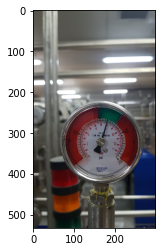

In [16]:
if len(center_dict_filter) == 3:
    aux_dict = center_dict_filter.copy()
    key_seg = list(center_dict_filter.keys())[np.argmin([center_dict_filter[k][3] for k in center_dict_filter])]
    del aux_dict[key_seg]
    key_min = list(aux_dict.keys())[np.argmax([aux_dict[k][2] for k in aux_dict])]
    del aux_dict[key_min]
    key_hr = list(aux_dict.keys())[0]
    seg = round (((center_dict_filter[key_seg][1] + 90) % 360)/360 * 60) % 60
    minu = round(((center_dict_filter[key_min][1] + 90) % 360)/360 * 60) % 60
    hr = round(((center_dict_filter[key_hr][1] + 90) % 360)/360 * 12) % 12
    print("La hora es: ",hr , ":", minu, ":", seg)
    
elif len(center_dict_filter) == 2:
    aux_dict = center_dict_filter.copy()
    key_min = list(aux_dict.keys())[np.argmax([aux_dict[k][2] for k in aux_dict])]
    del aux_dict[key_min]
    key_hr = list(aux_dict.keys())[0]
    minu = round(((center_dict_filter[key_min][1] + 90) % 360)/360 * 60) % 60
    hr = round(((center_dict_filter[key_hr][1] + 90) % 360)/360 * 12) % 12
    if hr == 0: hr = 12
    print("La hora es: ",hr , ":", minu)

plt.figure()
plt.imshow(o_image)

In [47]:
"La hora es: " + str(hr)+ ":" + str(minu)

'La hora es: 8:0'

In [30]:
new_size = polar_image.shape[1]
new_size

50